In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
train=pd.read_csv('customer_churn_dataset-training-master.csv')
train.shape

(440833, 12)

In [23]:
test=pd.read_csv('customer_churn_dataset-testing-master.csv')
test.shape

(64374, 12)

In [24]:
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [25]:
test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [26]:
df=pd.concat([train,test],axis=0)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [27]:
del df['CustomerID']
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [28]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [29]:
df = pd.get_dummies(data=df , columns=['Gender'] , drop_first=True)
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Gender_Male
0,30.0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,False
1,65.0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,False
2,55.0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,False
3,58.0,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,True
4,23.0,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,True


In [30]:
df['Gender_Male'] = df['Gender_Male'].astype(int)
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Gender_Male
0,30.0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,0
1,65.0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,0
2,55.0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,0
3,58.0,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,1
4,23.0,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,1


In [31]:
df = pd.get_dummies(data=df , columns=['Contract Length'] , drop_first=True)
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Last Interaction,Churn,Gender_Male,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,Standard,932.0,17.0,1.0,0,False,False
1,65.0,49.0,1.0,10.0,8.0,Basic,557.0,6.0,1.0,0,True,False
2,55.0,14.0,4.0,6.0,18.0,Basic,185.0,3.0,1.0,0,False,True
3,58.0,38.0,21.0,7.0,7.0,Standard,396.0,29.0,1.0,1,True,False
4,23.0,32.0,20.0,5.0,8.0,Basic,617.0,20.0,1.0,1,True,False


In [32]:
df['Contract Length_Monthly'] = df['Contract Length_Monthly'].astype(int)
df['Contract Length_Quarterly'] = df['Contract Length_Quarterly'].astype(int)

df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Last Interaction,Churn,Gender_Male,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,Standard,932.0,17.0,1.0,0,0,0
1,65.0,49.0,1.0,10.0,8.0,Basic,557.0,6.0,1.0,0,1,0
2,55.0,14.0,4.0,6.0,18.0,Basic,185.0,3.0,1.0,0,0,1
3,58.0,38.0,21.0,7.0,7.0,Standard,396.0,29.0,1.0,1,1,0
4,23.0,32.0,20.0,5.0,8.0,Basic,617.0,20.0,1.0,1,1,0


In [33]:
df = pd.get_dummies(data=df , columns=['Subscription Type'] , drop_first=True)
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Contract Length_Monthly,Contract Length_Quarterly,Subscription Type_Premium,Subscription Type_Standard
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,0,0,0,False,True
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,0,1,0,False,False
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,0,0,1,False,False
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,1,1,0,False,True
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,1,1,0,False,False


In [34]:
df=df.dropna()

In [35]:
df['Age'] = df['Age'].astype(int)
df['Tenure'] = df['Tenure'].astype(int)
df['Usage Frequency'] = df['Usage Frequency'].astype(int)
df['Support Calls'] = df['Support Calls'].astype(int)
df['Total Spend'] = df['Total Spend'].astype(int)
df['Last Interaction'] = df['Last Interaction'].astype(int)
df['Churn'] = df['Churn'].astype(int)
df['Payment Delay'] = df['Payment Delay'].astype(int)
df ['Subscription Type_Standard']=df['Subscription Type_Standard'].astype(int)
df['Subscription Type_Premium'] = df['Subscription Type_Premium'].astype(int)

df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Contract Length_Monthly,Contract Length_Quarterly,Subscription Type_Premium,Subscription Type_Standard
0,30,39,14,5,18,932,17,1,0,0,0,0,1
1,65,49,1,10,8,557,6,1,0,1,0,0,0
2,55,14,4,6,18,185,3,1,0,0,1,0,0
3,58,38,21,7,7,396,29,1,1,1,0,0,1
4,23,32,20,5,8,617,20,1,1,1,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 64373
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Age                         505206 non-null  int32
 1   Tenure                      505206 non-null  int32
 2   Usage Frequency             505206 non-null  int32
 3   Support Calls               505206 non-null  int32
 4   Payment Delay               505206 non-null  int32
 5   Total Spend                 505206 non-null  int32
 6   Last Interaction            505206 non-null  int32
 7   Churn                       505206 non-null  int32
 8   Gender_Male                 505206 non-null  int32
 9   Contract Length_Monthly     505206 non-null  int32
 10  Contract Length_Quarterly   505206 non-null  int32
 11  Subscription Type_Premium   505206 non-null  int32
 12  Subscription Type_Standard  505206 non-null  int32
dtypes: int32(13)
memory usage: 28.9 MB


In [37]:
y = df['Churn']

x = df.drop('Churn',axis=1)
x.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Male,Contract Length_Monthly,Contract Length_Quarterly,Subscription Type_Premium,Subscription Type_Standard
0,30,39,14,5,18,932,17,0,0,0,0,1
1,65,49,1,10,8,557,6,0,1,0,0,0
2,55,14,4,6,18,185,3,0,0,1,0,0
3,58,38,21,7,7,396,29,1,1,0,0,1
4,23,32,20,5,8,617,20,1,1,0,0,0


In [39]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)

In [40]:
xtrain.columns

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Gender_Male',
       'Contract Length_Monthly', 'Contract Length_Quarterly',
       'Subscription Type_Premium', 'Subscription Type_Standard'],
      dtype='object')

In [41]:
ytrain

193093    1
6414      1
324150    0
118147    1
213396    1
         ..
259179    0
365839    0
131932    1
146867    1
121958    1
Name: Churn, Length: 353644, dtype: int32

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(xtrain)

x_train_sc = sc.transform(xtrain)
x_test_sc = sc.transform(xtest)

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(x_train_sc , ytrain)

In [44]:
from sklearn.metrics import accuracy_score

y_pred_train = rf.predict(x_train_sc)
y_pred_train
accuracy_score(y_true=ytrain , y_pred=y_pred_train)

0.9999971722975648

In [45]:
y_pred_test = rf.predict(x_test_sc)
y_pred_test
accuracy_score(y_true=ytest , y_pred=y_pred_test)

0.9344690621659782

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


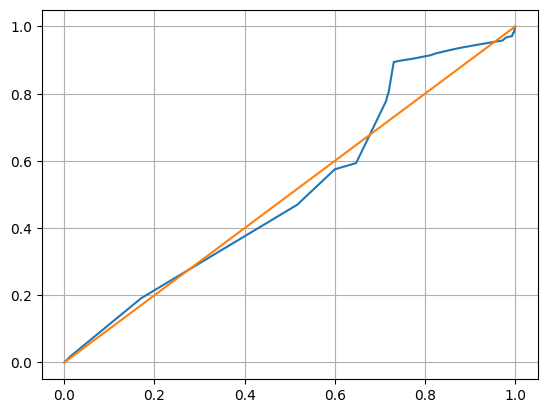

In [46]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(ytrain,rf.predict_proba(xtrain)[:,1])    
plt.plot(fpr,tpr)    
plt.plot([0,1],[0,1])    
plt.grid()    
plt.show()  

In [47]:
import pickle

# Assuming 'model' is your trained machine learning model
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)


c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


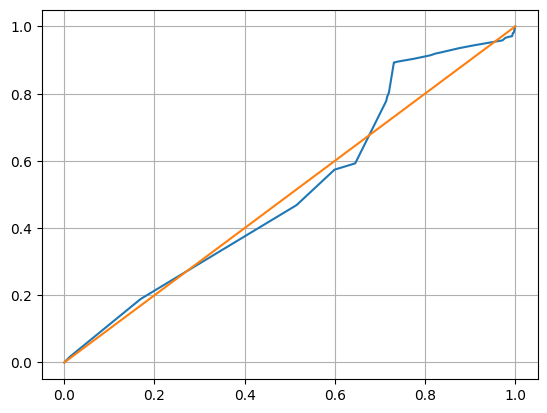

In [48]:
fpr,tpr,thresholds = roc_curve(ytest,rf.predict_proba(xtest)[:,1])   
plt.plot(fpr,tpr)    
plt.plot([0,1],[0,1])    
plt.grid()    
plt.show()